In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('../data/boston_housing.csv')

In [3]:
###  Handle Missing Values 
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [4]:
###  Handle Outliers
# Cap extreme crime values
crime_99th = df['crim'].quantile(0.99)
df['crim'] = df['crim'].clip(upper=crime_99th)

In [5]:
# Log transform skewed features
df['log_crim'] = np.log1p(df['crim'])
df['log_lstat'] = np.log1p(df['lstat'])

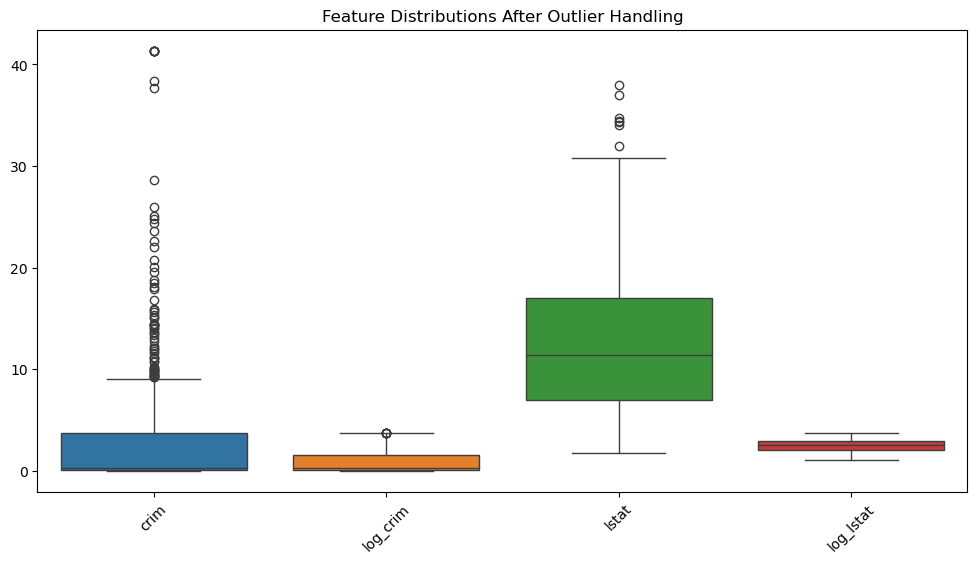

In [6]:
# Visualize changes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['crim', 'log_crim', 'lstat', 'log_lstat']])
plt.title("Feature Distributions After Outlier Handling")
plt.xticks(rotation=45)
plt.show()

In [7]:
# Select features to scale (excluding target and dummy variables)
features_to_scale = ['crim', 'zn', 'indus', 'nox', 'rm', 
                    'age', 'dis', 'rad', 'tax', 'ptratio', 
                    'b', 'lstat', 'log_crim', 'log_lstat']

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

###  Train-Test Split
X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
### Save Processed Data
X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

print("\nPreprocessing complete!")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Preprocessing complete!
Training set: 404 samples
Test set: 102 samples
